In [115]:
import random,math,pylab
import time,os
import imageio
import numpy as np

## Muestreo Directo

pregunta 1:
* $\textit{Sigma}$: Dado que L parece ser la magnitud de longitud de un lado del cubo definido por (sigma|1-sigma) entonces se puede considerar que sigma define la posicion inicial y final de los puntos que definen la caja.
* $\textit{direct\_disks\_box}$: Permite construir las dimensiones de la caja dado una condicion especifica la cual pone a prueba la longitud creada L, con otra creada aleatoriamente "a", mide la distancia entre estos lados y si es menor que 2.0*sigma entonces no es adecuada la L, si no ocurre esto entonces se almacena las L de cada particula, si son N=4 particulas, arroja dim(L) = 4.

pregunta 2:
* hit_condition es verdadera si y solo si condition_b es verdadera, esto ocurre cuando al obtener el minimo valor de las restas de los puntos de cada configuracion, este es menor que 0.05 lo que implica un 5% de exactitud.

pregunta 3:
* condition_b se construye con una tupla de valores absolutos de restas entre puntos de las configuraciones y los valores construidos con direct_disks_box. se obtiene el maximo valor de estos dos y se construye una lista de maximos valores, a esta lista se obtiene el mas pequeño que luego se compara con los grados de significacion que en este caso es de 0.05,
* hits es un diccionario el cual almacena las configuraciones que actuan como contador, si condition_hit es verdadero, entonces suma 1 por cada vez que ocurre la condicion verdadera.

In [81]:
def direct_disk_box(N,sigma):
    condition = False
    while condition == False: # permanece en false hasta que termine la generacion de muestras aleatorias.
        L = [(random.uniform(sigma,1.0-sigma),random.uniform(sigma,1.0-sigma))] # define un punto aleatorio dentro de los limites de la caja.
        for _ in range(1,N): # N determina cuantos puntos se crean.
            a = (random.uniform(sigma,1.0-sigma),random.uniform(sigma,1.0-sigma)) # define un punto aleatorio a comparar con L.
            min_dist = min(math.sqrt((a[0]-b[0]) ** 2 + (a[1]-b[1]) ** 2) for b in L) # hace una lista de distancias entre a y L, luego toma el minimo.
            if min_dist < 2.0 * sigma: # si la distancia minima es < que 2 veces el radio, no acepta el punto.
                condition = False # continua el while.
                break # se sale del for para crear otra L.
            else: # si la distancia minima es >= que 2 veces el radio.
                L.append(a) # guarda el punto a en L
                condition = True # se da la condicion de salir del while pero aun no termina el for y este sigue activo hasta cumplir N casos.
    return L # retorna N puntos en L que son configuraciones legales.

In [44]:
sigma = 0.15 # radio
n_runs = 10**4 # numero de veces que se genera posibles configuraciones.
conf_a = ((0.30,0.30),(0.30,0.70),(0.70,0.30),(0.70,0.70)) # hint a
conf_b = ((0.20,0.20),(0.20,0.80),(0.75,0.25),(0.75,0.75)) # hint b
conf_c = ((0.30,0.20),(0.30,0.80),(0.70,0.20),(0.70,0.70)) # hint c

In [93]:
def direct_sampling_hits(N,sigma,n_runs):
    del_xy = 0.05 # condicion minima para que delta de x| delta de y debe tener para considerar una configuracion como legal (debe ser pequeña)
    config = [conf_a,conf_b,conf_c] # lista de configuraciones
    for i in range(3): # realiza 3 ejecuciones del codigo.
        hits = {conf_a:0, conf_b:0, conf_c:0} # define los hits en 0 cada que vuelve a ejecutarse.
        print("ejecucion:",i+1) # indica el numero de la ejecucion.
        for run in range(n_runs): # range(0,n_runs)
            x_vec = direct_disk_box(N,sigma) # crea las N configuraciones posibles que pueden describir el sistema.
            for conf in config: # para cada configuracion
                condition_hit = True # si condition_hit=True --> 1
                for b in conf: # toma cada punto dentro de la configuracion especifica.
                    condition_b = min(max(abs(a[0]-b[0]), abs(a[1]-b[1])) for a in x_vec) < del_xy # lista de deltas x | deltas y luego toma el minimo
                    condition_hit *= condition_b # si el minimo es menor que 0.05 entonces condition_hit = 1*1 = 1, si no 1*0 = 0 --> False
                if condition_hit: # si es True
                    hits[conf] += 1 # suma un hit de configuracion legal. si condition_hit = False, no suma.
        for conf in configurations:
            print(conf," -- ",hits[conf]) # muestra la configuracion y las veces que hizo hit.
            print("probabilidad:",round((hits[conf]/n_runs)*100,5)) # aproximacion del numero de hits/(n_runs - hits) ~ hits/n_runs
        print("\n")

### Muestreo directo para $n \_ run = 10^{4}$

In [67]:
direct_sampling_hits(4,sigma=0.15,n_runs=10**4)

corrida: 1
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  3
probabilidad: 0.03
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  1
probabilidad: 0.01
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  7
probabilidad: 0.07


corrida: 2
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  3
probabilidad: 0.03
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  1
probabilidad: 0.01
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  3
probabilidad: 0.03


corrida: 3
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  1
probabilidad: 0.01
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  0
probabilidad: 0.0
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  0
probabilidad: 0.0




### Muestreo directo para $n \_ run = 10^{5}$

In [65]:
direct_sampling_hits(4,sigma=0.15,n_runs=10**5)

corrida: 1
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  6
probabilidad: 0.006
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  13
probabilidad: 0.013
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  12
probabilidad: 0.012


corrida: 2
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  8
probabilidad: 0.008
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  13
probabilidad: 0.013
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  15
probabilidad: 0.015


corrida: 3
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  9
probabilidad: 0.009
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  7
probabilidad: 0.007
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  16
probabilidad: 0.016




### Muestreo directo para $n \_ run = 10^{6}$

In [64]:
direct_sampling_hits(4,sigma=0.15,n_runs=10**6)

corrida: 1
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  112
probabilidad: 0.0112
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  110
probabilidad: 0.011
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  110
probabilidad: 0.011


corrida: 2
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  113
probabilidad: 0.0113
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  122
probabilidad: 0.0122
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  126
probabilidad: 0.0126


corrida: 3
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  118
probabilidad: 0.0118
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  112
probabilidad: 0.0112
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  110
probabilidad: 0.011




Sabemos que la probabilidad de ocurrencia de cada configuracion es independiente de las otras configuraciones, por lo que suponiendo que son equiprobables entonces podriamos preguntarnos: ¿cual es la probabilidad de que en "n_runs" ocurra un hit o acierto para una configuracion especifica?, por lo que la probabilidad esta dada por:

\begin{equation}
    p = \frac{hits}{ n \_ runs }
\end{equation}

Al realizar 3 veces cada corrida en cada caso $(n \_ runs=[10^{4},10^{5},10^{6}])$ nos damos cuenta que podemos hablar de equiprobabilidad solamente cuando n_runs es lo suficientemente grande, eso se evidencia cuando ($n \_ runs = 10^{6}$) ya que aproximadamente en todas las corridas para cada configuracion la probabilidad es la misma (0.01% de que ocurra hits en n_runs), para los otros casos, vemos que estas probabilidades fluctuan de forma cada vez mas evidente a medida que n_runs disminuye.

In [68]:
del_xy = 0.05 # condicion.
conf_a = ((0.25,0.25),(0.25,0.5),(0.25,0.75),(0.50,0.375),(0.50,0.625),(0.75,0.25),(0.75,0.50),(0.75,0.75)) # conf a con N=8
conf_b = ((0.25,0.375),(0.25,0.625),(0.50,0.25),(0.50,0.50),(0.50,0.75),(0.75,0.20),(0.75,0.55),(0.75,0.70)) # conf b con N=8
conf_c = ((0.30,0.25),(0.30,0.55),(0.30,0.70),(0.50,0.25),(0.50,0.50),(0.50,0.75),(0.75,0.40),(0.75,0.80)) # conf c con N=8
configurations = [conf_a,conf_b,conf_c] # lista de configuraciones.

Cuando N=8, es necesario reformular el radio sigma de las esferas, esto debido a que como hay tantas esferas en un espacio reducido existe muy poca probabilidad de generar un punto aleatorio que permita la condicion min_dist < 2.0*sigma, esto implica un bucle casi que infinito por que en direct_disk_box no se llega a salir del while por que condition sera False mientras que no se de la condicion.

la condicion min_dist < 2.0*sigma, implica que las esferas creadas deben estar separadas al limite de su radio, es decir a 2 veces el radio, por lo que cuando crece sigma a un valor muy grande por ejemplo 0.4 que se encuentra en el rango de 0-1, se observa que no hay esferas de 0.4 de radio que puedan caber en una caja de largo 1 con separacion entre esferas de 0.8.

## Muestreo con base en cadenas de Markov

In [10]:
L = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]] # hint de L.
conf_a = ((0.30,0.30),(0.30,0.70),(0.70,0.30),(0.70,0.70))
conf_b = ((0.20,0.20),(0.20,0.80),(0.75,0.25),(0.75,0.75))
conf_c = ((0.30,0.20),(0.30,0.80),(0.70,0.20),(0.70,0.70))

In [8]:
def markovChain(L,sigma=0.15,delta=0.1):
    sigma_sq = sigma**2
    for steps in range(1000): # range(0,1000)
        a = random.choice(L) # toma de forma aleatoria un punto de L. (condicion de markov, ya que depende del hint inmediatamente anterior)
        b = [a[0]+random.uniform(-delta,delta), a[1]+random.uniform(-delta,delta)] # suma a cada comp del punto un valor entre -0.1 y 0.1 uniforme aleatorio.
        min_dist = min((b[0]-c[0])**2 + (b[1] - c[1]) ** 2 for c in L if c != a) # mide la distancia minima entre b y L excluyendo el punto el cual se uso para crear b.
        box_cond = min(b[0],b[1]) < sigma or max(b[0],b[1]) > 1.0 - sigma # como es or entonces si almenos uno es verdad entonces box_cond = True, si ambos falsos entonces box_cond=False
        if not (box_cond or min_dist < 4.0 * sigma_sq): # Si False, el punto generado es aceptado ya que se no se superpone ni se sale del rango.
            a[:] = b # sobreescribe el valor que se tomo de a. este proceso lo hace hasta que todos los valores de L sean aceptables
    return L

In [23]:
def markov_sampling_hits(L,n_runs,c): # misma rutina para buscar los hits que se uso en el muestreo directo.
    del_xy = 0.05
    config = [conf_a,conf_b,conf_c]
    for i in range(c):
        hits = {conf_a:0, conf_b:0, conf_c:0}
        print("corrida:",i+1)
        for run in range(n_runs):
            x_vec = markovChain(L) # se cambia la forma de generacion de puntos aleatorios por la de cadenas de Markov.
            for conf in config:
                condition_hit = True
                for b in conf:
                    condition_b = min(max(abs(a[0]-b[0]), abs(a[1]-b[1])) for a in x_vec) < del_xy
                    condition_hit *= condition_b
                if condition_hit:
                    hits[conf] += 1
        for conf in config:
            print(conf," -- ",hits[conf])
            print("probabilidad:",round((hits[conf]/n_runs)*100,5))
        print("\n")


### Muestreo basado en cadenas de Markov para $n \_ run = 10^{4}$ -- Tiempo de ejecucion = 0.5 min

In [24]:
markov_sampling_hits(L,10**4,3)

corrida: 1
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  0
probabilidad: 0.0
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  0
probabilidad: 0.0
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  1
probabilidad: 0.01


corrida: 2
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  3
probabilidad: 0.03
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  1
probabilidad: 0.01
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  1
probabilidad: 0.01


corrida: 3
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  1
probabilidad: 0.01
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  0
probabilidad: 0.0
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  0
probabilidad: 0.0




### Muestreo basado en cadenas de Markov para $n \_ run = 10^{5}$ -- Tiempo de ejecucion = 6.0 min

In [25]:
markov_sampling_hits(L,10**5,3)

corrida: 1
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  9
probabilidad: 0.009
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  10
probabilidad: 0.01
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  6
probabilidad: 0.006


corrida: 2
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  11
probabilidad: 0.011
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  6
probabilidad: 0.006
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  7
probabilidad: 0.007


corrida: 3
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  15
probabilidad: 0.015
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  8
probabilidad: 0.008
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  12
probabilidad: 0.012




### Muestreo basado en cadenas de Markov para $n \_ run = 10^{6}$ -- Tiempo de ejecucion = 60.0 min

In [26]:
markov_sampling_hits(L,10**6,3)

corrida: 1
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  130
probabilidad: 0.013
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  77
probabilidad: 0.0077
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  130
probabilidad: 0.013


corrida: 2
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  133
probabilidad: 0.0133
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  122
probabilidad: 0.0122
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  108
probabilidad: 0.0108


corrida: 3
((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7))  --  123
probabilidad: 0.0123
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75))  --  118
probabilidad: 0.0118
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7))  --  111
probabilidad: 0.0111




## Muestreo basado en Dinámica molecular

El programa no esta determinado por bucles sino por eventos determinados por logica computacional que puede derivar en ramificaciones.

Event-driven Molecular Dynamics: Se considera objetos rigidos de volumen finito, en este tipo de simulaciones de colisiones entre particulas se consideran los eventos instantaneos de interaciones entre particulas y entre las que no interactuan. No se considera fuerzas, solo colisiones binarias, es decir que interaciones entre 3 o mas particulas se ignoran. El proceso para esto es calcular el tiempo entre dos colisiones y obtener las velocidades de dos particulas despues de la colision.

se considera $r_{ij} = r_{i} - r_{j}$ y la velocidad relativa $v_{ij} = v_{i} - v_{j}$.
Se calcula para cada pareja de particulas (i,j) el tiempo $t_{ij}$ cuando la siguiente colision ocurre: $|r_{ij}(t_{ij})| = R_{i} + R_{j}$ -> $|r_{ij}(t_{o})+v_{ij}t_{ij}| = R_{i} + R_{j}$ donde $t_{o}$ es el instante en que ocurre la colision, luego:

\begin{equation}
    v_{ij}^{2}t_{ij}^{2} + 2(r_{ij}(t_{o})v_{ij})t_{ij} + (r_{ij}(t_{o}))^{2} - (R_{i} + R_{j})^{2} = 0
\end{equation}

El tiempo de $t_{c}$ que es cuando ocurre la siguiente colision es el minimo tiempo entre los ocurridos entre pares, es decir: $t_{c} = min_{ij}(t_{ij})$

In [29]:
def wall_time(pos_a,vel_a,sigma):
    if vel_a > 0.0: # si tiene velocidad positiva, se mueve -->
        del_t = (1.0 - sigma - pos_a)/vel_a # el delta tiempo esta determinado por la (dimension de la caja - posicion particula) / velocidad 
    elif vel_a < 0.0: # si tiene velocidad negativa, se mueve <--
        del_t = (pos_a - sigma)/abs(vel_a) # el delta tiempo esta definido en la (posicion particula - radio) / velocidad
    else: # si no hay velocidad
        del_t = float('inf') # no determina delta tiempo.
    return del_t

def pair_time(pos_a,vel_a,pos_b,vel_b,sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]] # delta de las posiciones en x y y.
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2 # hipotenusa del triangulo definido por los delta de las posiciones en x y y.
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]] # delta de las velocidades
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2 # hipotenusa del triangulo definido por los delta de las velocidades.
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1] 
    upsilon = scal ** 2 - del_v_sq * ( del_x_sq - 4.0 * sigma ** 2)
    if upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(upsilon))/del_v_sq
    else:
        del_t = float('inf')
    return del_t

event-driven Molecular
dynamics por Alder and Wainwright (1957). Qu´e es un evento?

In [114]:
conf_a = ((0.30,0.30),(0.30,0.70),(0.70,0.30),(0.70,0.70))
conf_b = ((0.20,0.20),(0.20,0.80),(0.75,0.25),(0.75,0.75))
conf_c = ((0.30,0.20),(0.30,0.80),(0.70,0.20),(0.70,0.70))
configurations = [conf_a,conf_b,conf_c]
hits = {conf_a:0, conf_b:0, conf_c:0}
del_xy = 0.10
pos = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]
vel = [[0.21,0.12],[0.71,0.18],[-0.23,-0.79],[0.78,0.1177]]
singles = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]
pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
sigma = 0.10
t = 0.0
n_events = 5000000
pos_aa = [] # almacena los datos de las posiciones en x y y
for event in range(n_events): # range(0,5000000)
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k,l in singles] # genera las condiciones para una colision con paredes
    pair_times = [pair_time(pos[k],vel[k],pos[l],vel[l],sigma) for k,l in pairs] # genera las condiciones para una colision entre pares.
    next_event = min(wall_times + pair_times) # busca el minimo entre la combinacion de ambas listas (sera el proximo evento)
    t_previous = t # almacena el tiempo anterior.
    for inter_times in range(int(t + 1), int(t + next_event + 1)): # rango entre tiempo siguiente y tiempo inmediatamente siguiente a ese.
        del_t = inter_times - t_previous # delta de tiempo entre tiempo actual y el anterior.
        for k,l in singles:
            pos[k][l] += vel[k][l] * del_t # actualiza las posiciones nuevas
        t_previous = inter_times # actualiza el tiempo previo.
        #print(event,t)
        for conf in configurations: # Mismas condiciones para hit implementado en los otros algoritmos.
            condition_hit = True
            for b in conf:
                condition_b = min(max(abs(a[0]-b[0]), abs(a[1]-b[1])) for a in pos) < del_xy
                condition_hit *= condition_b
            if condition_hit:
                hits[conf] += 1
    t += next_event # Actualiza tiempo
    del_t = t - t_previous # determina nuevamente el delta t.
    pos_a = [] # almacena las posiciones
    for k,l in singles:
        pos[k][l] += vel[k][l] * del_t # actualiza posiciones
        pos_a.append(pos[k][l]) # guarda estas

    if min(wall_times) < min(pair_times): # condicion para colision con la pared
        collision_disk,direction = singles[wall_times.index(next_event)] # el indice del evento donde ocurrio la colision con la pared se usa para ver los valores de indices single
        vel[collision_disk][direction] *= -1.0 # genera un rebote por medio de esa colision
    else: # condicion para colision con pares
        a,b = pairs[pair_times.index(next_event)] # similarmente toma los indices de pairs basado en el indice donde ocurre la colision
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]] # toma los deltas de la posicion
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2) # determina la distancia estre los puntos
        e_perp = [c/abs_x for c in del_x] 
        del_v = [vel[b][0] - vel[a][0],vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] += e_perp[k] * scal # actualiza las velocidades
            vel[b][k] -= e_perp[k] * scal # genera rebote entre particulas
    pos_aa.append(pos_a) # guarda las posiciones.

for conf in configurations:
    print(conf,hits[conf])

((0.3, 0.3), (0.3, 0.7), (0.7, 0.3), (0.7, 0.7)) 706
((0.2, 0.2), (0.2, 0.8), (0.75, 0.25), (0.75, 0.75)) 680
((0.3, 0.2), (0.3, 0.8), (0.7, 0.2), (0.7, 0.7)) 663


In [116]:
pst = np.array(pos_aa) # hace copia de las posiciones
pst = pst.reshape((5000000,4,2)) # realiza un reshape para que sean tuplas (x,y)

x_pos = [] # separa las x
y_pos = [] # separa las y
for i in pst:
    for j in i:
        x_pos.append(j[0])
        y_pos.append(j[1])

Se observa que la frecuencia con que se observa las particulas en diferentes posiciones dentro de los limites es similar, lo que sugiere que las posiciones asociadas a eventos diferentes son igualmente probables excepto en los bordes o limites de la caja, que es donde existe mayor probabilidad de encontrar una particula.

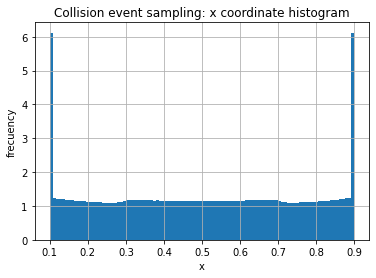

In [119]:
pylab.hist(x_pos,bins=100,density=True);
pylab.xlabel("x")
pylab.ylabel("frecuency")
pylab.title("Collision event sampling: x coordinate histogram")
pylab.grid()
pylab.savefig("collision_posx_hist.png")
pylab.show()

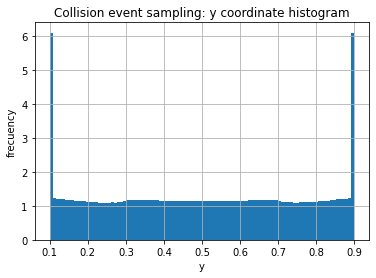

In [120]:
pylab.hist(y_pos,bins=100,density=True);
pylab.xlabel("y")
pylab.ylabel("frecuency")
pylab.title("Collision event sampling: y coordinate histogram")
pylab.grid()
pylab.savefig("collision_posy_hist.png")
pylab.show()

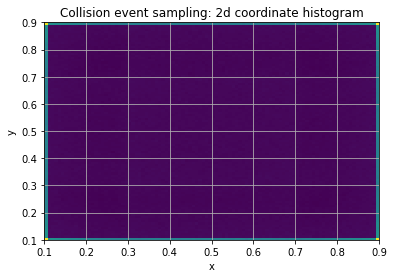

In [121]:
pylab.hist2d(x_pos,y_pos,bins=100,density=True);
pylab.xlabel("x")
pylab.ylabel("y")
pylab.title("Collision event sampling: 2d coordinate histogram")
pylab.grid()
pylab.savefig("collision_2d_hist.png")
pylab.show()

## Histograma de las posiciones en muestreo directo y basado en colisiones de Markov

In [87]:
def direct_disks_box(N,sigma): # implementacion ya expuesta sobre muestreo directo.
    overlap = True
    while overlap == True:
        L = [(random.uniform(sigma, 1.0-sigma), random.uniform(sigma,1.0-sigma))]
        for k in range(1,N):
            a = (random.uniform(sigma,1.0-sigma),random.uniform(sigma,1.0-sigma))
            min_dist_sq = min(((a[0]-b[0])**2 + (a[1]-b[1])**2 ) for b in L)
            if min_dist_sq < 4.0 * sigma ** 2:
                overlap = True
                break
            else:
                overlap = False
                L.append(a)
    return L

## Muestreo directo

In [ ]:
N=4
sigma = 0.1197
n_runs = 1000000
histo_data_x = []
histo_data_y = []
for run in range(n_runs):
    pos = direct_disks_box(N,sigma)
    for k in range(N):
        histo_data_x.append(pos[k][0]) # obtiene las x de la posicion creada por el muestreo aleatorio
        histo_data_y.append(pos[k][1]) # obtiene las y de la posicion creada por el muestreo aleatorio


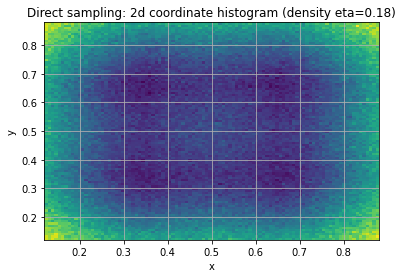

In [107]:
pylab.hist2d(histo_data_x,histo_data_y,bins=100,density=True)
pylab.xlabel("x")
pylab.ylabel("y")
pylab.title("Direct sampling: 2d coordinate histogram (density eta=0.18)")
pylab.grid()
pylab.savefig("direct_disks_histo_2d.png")
pylab.show()

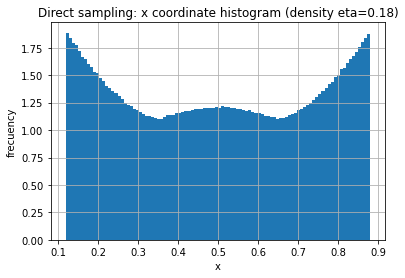

In [108]:
pylab.hist(histo_data_x,bins=100,density=True)
pylab.xlabel("x")
pylab.ylabel("frecuency")
pylab.title("Direct sampling: x coordinate histogram (density eta=0.18)")
pylab.grid()
pylab.savefig("direct_disks_histo.png")
pylab.show()

## Cadenas de Markov

In [ ]:
n_runs = 2000000
histo_data_x = []
histo_data_y = []
L = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]
for run in range(n_runs):
    pos = markovChain(L,sigma=0.1197)
    for k in range(N):
        histo_data_x.append(pos[k][0]) # obtiene las x de la posicion creada por el muestreo aleatorio
        histo_data_y.append(pos[k][1]) # obtiene las y de la posicion creada por el muestreo aleatorio

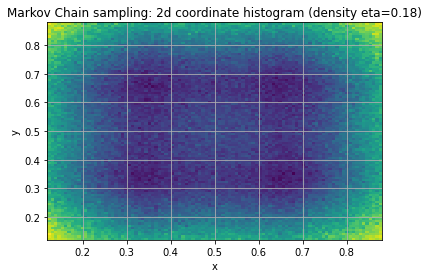

In [102]:
pylab.hist2d(histo_data_x,histo_data_y,bins=100,density=True)
pylab.xlabel("x")
pylab.ylabel("y")
pylab.title("Markov Chain sampling: 2d coordinate histogram (density eta=0.18)")
pylab.grid()
pylab.savefig("markov_disks_histo_2d.png")
pylab.show()

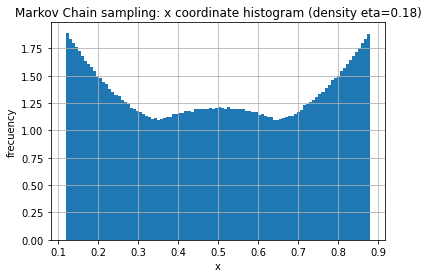

In [104]:
pylab.hist(histo_data_x,bins=100,density=True)
pylab.xlabel("x")
pylab.ylabel("frecuency")
pylab.title("Markov Chain sampling: x coordinate histogram (density eta=0.18)")
pylab.grid()
pylab.savefig("markov_disks_histo.png")
pylab.show()

Una posible explicación de esto es debido a la forma en que se construyen las esferas que se consideran configuraciones legales, como estas en principio se construyen en una posición aleatoria, es posible que se solape con las partículas que corresponden a cada configuración, esta no es una configuración legal y se descarta, cuando las configuraciones legales se dan, es decir cuando no se solapan, se considera esto como un hit, permitiendo hacer un conteo de las configuraciones legales. El problema con esto es que realmente no existe una interacción entre esferas que se desplacen en todo el espacio sino que estas se posicional aleatoriamente de tal forma que se discrimina todo el espacio haciendo imposible hablar de una distribución de posiciones uniformes. Si este es el caso, dada la problemática, una forma de solucionar la distribución uniforme es aumentar mucho mas el valor de $n \_ runs$ con el propósito de buscar muchas mas configuraciones legales ya que en el caso mas extremo, esto da lugar a cubrir todo el espacio dentro de la caja con esferas posicionadas aleatoriamente.

## Animación

Producing animation.gif using ImageMagick...


4

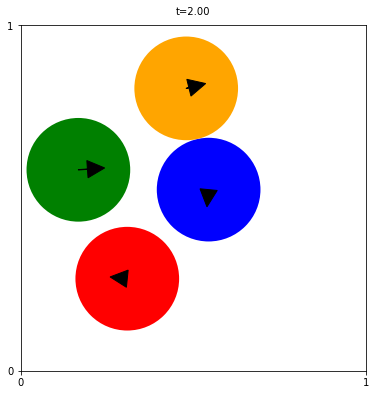

In [111]:
output_dir = "event_disks_box_movie"
colors = ['r','b','g','orange']

def wall_time(pos_a,vel_a,sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a)/vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma)/abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a,vel_a,pos_b,vel_b,sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    upsilon = scal ** 2 - del_v_sq * (del_x_sq - 4.0 * sigma ** 2)
    if upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

def min_arg(l):
    return min(zip(l,range(len(l))))

def compute_next_event(pos,vel):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k,l in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k,l in pairs]
    return min_arg(wall_times + pair_times)

def compute_new_velocity(pos,vel,next_event_arg):
    if next_event_arg < len(singles):
        collision_disk, direction = singles[next_event_arg]
        vel[collision_disk][direction] *= -1.0
    else:
        a,b = pairs[next_event_arg - len(singles)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] *= e_perp[k] * scal
            vel[b][k] -= e_perp[k] * scal

pylab.subplots_adjust(left=0.10,right=0.90,top=0.90,bottom=0.10)
pylab.gcf().set_size_inches(6,6)
img = 0
if not os.path.exists(output_dir): os.makedirs(output_dir)
def snapshot(t,pos,vel,colors,arrow_scale=.2):
    global img
    pylab.cla()
    pylab.axis([0,1,0,1])
    pylab.setp(pylab.gca(),xticks=[0,1],yticks=[0,1])
    for (x,y),(dx,dy),c in zip(pos,vel,colors):
        dx *= arrow_scale
        dy *= arrow_scale
        circle = pylab.Circle((x,y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
        pylab.arrow(x,y,dx,dy,fc='k',ec='k',head_width=0.05,head_length=0.05)
    pylab.text(.5,1.03,'t=%.2f'%t, ha='center')
    pylab.savefig(os.path.join(output_dir,'%04i.png'%img))
    img += 1

pos = [[0.25,0.25],[0.75,0.25],[0.25,0.75],[0.75,0.75]]
vel = [[0.21,0.12],[0.71,0.18],[-0.23,-0.79],[0.78,0.1177]]
singles = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]
pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
sigma = 0.15
t = 0.0
dt = 0.02
n_steps = 100
next_event,next_event_arg = compute_next_event(pos,vel)
snapshot(t, pos, vel, colors)
for step in range(n_steps):
    if dt:
        next_t = t + dt
    else:
        next_event = t + next_event
    while t + next_event <= next_t:
        t += next_event
        for k,l in singles: pos[k][l] += vel[k][l] * next_event
        compute_new_velocity(pos,vel,next_event_arg)
        next_event,next_event_arg = compute_next_event(pos,vel)
    remain_t = next_t-t
    for k,l in singles: pos[k][l] += vel[k][l] * remain_t
    t += remain_t
    next_event -= remain_t
    snapshot(t, pos, vel, colors)
    #print('time',t)

print('Producing animation.gif using ImageMagick...')
os.system("convert -delay 1 -dispose Background +page " + str(output_dir)
          + "/*.png -loop 0 " + str(output_dir) + "/animation.gif")

In [113]:
path = 'D:/Cursos/Mineria de datos/Miniproyecto1/event_disks_box_movie/'

image_folder = os.fsencode(path)

filenames = []

for file in os.listdir(image_folder):
    filename = os.fsdecode(file)
    if filename.endswith( ('.jpeg', '.png', '.gif') ):
        filenames.append(os.path.join(path,filename))

filenames.sort() # this iteration technique has no built in order, so sort the frames

images = list(map(lambda filename: imageio.imread(filename), filenames))

imageio.mimsave(os.path.join('movie.gif'), images, duration = 0.04) # modify duration as needed

![Alt Text](movie.gif)